max=0
if ls .pig/objects/.snapshot.* >/dev/null 2>&1; then
    for snap_dir in .pig/objects/.snapshot.*; do
        number=$(echo $snap_dir | cut -d "." -f4 )
        if [ "$number" -gt "$max" ]; then
            max="$number"
        fi
    done

elif ! ls .pig/objects/.snapshot.* >/dev/null 2>&1; then
    max=-1
fi

max=$(($max+1))
mkdir .pig/objects/.snapshot."$max"

for backup_file in .pig/index/*; do
    cp $backup_file .pig/objects/.snapshot.$max/
done

echo Committed as commit "$max"


In [ ]:
For more information:
  https://www.shellcheck.net/wiki/SC2068 -- Double quote array expansions to ...
  https://www.shellcheck.net/wiki/SC2034 -- file_path appears unused. Verify ...
  https://www.shellcheck.net/wiki/SC2154 -- file_serial is referenced but not...
Test subset0_1 (init) - passed
Test subset0_2 (init with existing repo) - passed
Test subset0_3 (init with existing repo) - passed
Test subset0_4 (add with no previous init) - passed
Test subset0_5 (add with non-existent file) - passed
Test subset0_6 (add file) - passed
Test subset0_7 (add many files) - passed
Test subset0_8 (add, commit, show) - failed (Incorrect output)
Your program produced these 11 lines of output:
$ pigs-init
Initialized empty pigs repository in .pig
$ echo 1 > a
$ pigs-add a
$ echo 2 > a
$ pigs-commit -m message
Committed as commit 0
$ echo 3 > a
$ pigs-show 0:a
pigs-show: error: 'a' not found in commit 0
*** TEST STOPPED: incorrect output from pigs command

The correct 12 lines of output for this test were:
$ pigs-init
Initialized empty pigs repository in .pig
$ echo 1 > a
$ pigs-add a
$ echo 2 > a
$ pigs-commit -m message
Committed as commit 0
$ echo 3 > a
$ pigs-show 0:a
1
$ pigs-show :a
1

The difference between your output(-) and the correct output(+) is:
...
  $ pigs-show 0:a
- pigs-show: error: 'a' not found in commit 0
- *** TEST STOPPED: incorrect output from pigs command
+ 1
+ $ pigs-show :a
+ 1
Test subset0_9 (show) - failed (Incorrect output)
Your program produced these 20 lines of output:
$ pigs-init
Initialized empty pigs repository in .pig
$ echo line 1 > a
$ echo hello world > b
$ pigs-add a b
$ pigs-commit -m "first commit"
Committed as commit 0
$ echo line 2 >> a
$ pigs-add a
$ pigs-commit -m "second commit"
Committed as commit 1
$ pigs-log
1 second commit
0 first commit
$ echo line 3 >> a
$ pigs-add a
$ echo line 4 >> a
$ pigs-show 0:a
pigs-show: error: 'a' not found in commit 0
*** TEST STOPPED: incorrect output from pigs command

The correct 30 lines of output for this test were:
$ pigs-init
Initialized empty pigs repository in .pig
$ echo line 1 > a
$ echo hello world > b
$ pigs-add a b
$ pigs-commit -m "first commit"
Committed as commit 0
$ echo line 2 >> a
$ pigs-add a
$ pigs-commit -m "second commit"
Committed as commit 1
$ pigs-log
1 second commit
0 first commit
$ echo line 3 >> a
$ pigs-add a
$ echo line 4 >> a
$ pigs-show 0:a
line 1
$ pigs-show 1:a
line 1
line 2
$ pigs-show :a
line 1
line 2
line 3
$ pigs-show 0:b
hello world
$ pigs-show 1:b
hello world

The difference between your output(-) and the correct output(+) is:
...
  $ pigs-show 0:a
- pigs-show: error: 'a' not found in commit 0
- *** TEST STOPPED: incorrect output from pigs command
+ line 1
+ $ pigs-show 1:a
+ line 1
+ line 2
+ $ pigs-show :a
+ line 1
+ line 2
+ line 3
+ $ pigs-show 0:b
+ hello world
+ $ pigs-show 1:b
+ hello world
Test subset0_10 (show errors) - failed (Incorrect output)
Your program produced these 14 lines of output:
$ pigs-init
Initialized empty pigs repository in .pig
$ echo line 1 > a
$ echo hello world > b
$ pigs-add a b
$ pigs-commit -m "first commit"
Committed as commit 0
$ pigs-show :c
pigs-show: error: 'c' not found in index
$ pigs-show 0:c
pigs-show: error: 'c' not found in commit 0
$ pigs-show 2:a
pigs-show: error: 'a' not found in commit 0
*** TEST STOPPED: incorrect output from pigs command

The correct 13 lines of output for this test were:
$ pigs-init
Initialized empty pigs repository in .pig
$ echo line 1 > a
$ echo hello world > b
$ pigs-add a b
$ pigs-commit -m "first commit"
Committed as commit 0
$ pigs-show :c
pigs-show: error: 'c' not found in index
$ pigs-show 0:c
pigs-show: error: 'c' not found in commit 0
$ pigs-show 2:a
pigs-show: error: unknown commit '2'

The difference between your output(-) and the correct output(+) is:
...
  $ pigs-show 2:a
+ pigs-show: error: unknown commit '2'
- pigs-show: error: 'a' not found in commit 0
- *** TEST STOPPED: incorrect output from pigs command
Test subset0_11 (add, commit, no change, commit,) - failed (Incorrect output)
Your program produced these 11 lines of output:
$ pigs-init
Initialized empty pigs repository in .pig
$ echo 1 > a
$ pigs-add a
$ pigs-commit -m message1
Committed as commit 0
$ touch a
$ pigs-add a
$ pigs-commit -m message2
Committed as commit 1
*** TEST STOPPED: incorrect output from pigs command

The correct 10 lines of output for this test were:
$ pigs-init
Initialized empty pigs repository in .pig
$ echo 1 > a
$ pigs-add a
$ pigs-commit -m message1
Committed as commit 0
$ touch a
$ pigs-add a
$ pigs-commit -m message2
nothing to commit

The difference between your output(-) and the correct output(+) is:
...
  $ pigs-commit -m message2
+ nothing to commit
- Committed as commit 1
- *** TEST STOPPED: incorrect output from pigs command
Test subset0_12 (add, show, commit, show) - failed (Incorrect output)
Your program produced these 6 lines of output:
$ pigs-init
Initialized empty pigs repository in .pig
$ echo hi > a
$ pigs-add a
$ pigs-show :a
*** TEST STOPPED: no output from pigs command

The correct 11 lines of output for this test were:
$ pigs-init
Initialized empty pigs repository in .pig
$ echo hi > a
$ pigs-add a
$ pigs-show :a
hi
$ pigs-commit -m message1
Committed as commit 0
$ echo there >> a
$ pigs-show :a
hi

The difference between your output(-) and the correct output(+) is:
...
  $ pigs-show :a
- *** TEST STOPPED: no output from pigs command
+ hi
+ $ pigs-commit -m message1
+ Committed as commit 0
+ $ echo there >> a
+ $ pigs-show :a
+ hi
Test subset1_13 (commit -a) - failed (Incorrect output)
Your program produced these 13 lines of output:
$ pigs-init
Initialized empty pigs repository in .pig
$ echo hello >a
$ echo world >b
$ pigs-add a b
$ pigs-commit -m "first commit"
Committed as commit 0
$ echo line 2 >>a
$ pigs-commit -a -m "second commit"
Committed as commit 1
$ pigs-show 0:a
pigs-show: error: 'a' not found in commit 0
*** TEST STOPPED: incorrect output from pigs command

The correct 18 lines of output for this test were:
$ pigs-init
Initialized empty pigs repository in .pig
$ echo hello >a
$ echo world >b
$ pigs-add a b
$ pigs-commit -m "first commit"
Committed as commit 0
$ echo line 2 >>a
$ pigs-commit -a -m "second commit"
Committed as commit 1
$ pigs-show 0:a
hello
$ pigs-show 1:a
hello
line 2
$ pigs-show :a
hello
line 2

The difference between your output(-) and the correct output(+) is:
...
  $ pigs-show 0:a
- pigs-show: error: 'a' not found in commit 0
- *** TEST STOPPED: incorrect output from pigs command
+ hello
+ $ pigs-show 1:a
+ hello
+ line 2
+ $ pigs-show :a
+ hello
+ line 2
Test subset1_14 (add + commit -a) - failed (Incorrect output)
Your program produced these 14 lines of output:
$ pigs-init
Initialized empty pigs repository in .pig
$ echo line 1 >a
$ pigs-add a
$ pigs-commit -m "first commit"
Committed as commit 0
$ echo line 2 >>a
$ echo world >b
$ pigs-add b
$ pigs-commit -a -m "second commit"
Committed as commit 1
$ pigs-show 1:a
pigs-show: error: 'a' not found in commit 0
*** TEST STOPPED: incorrect output from pigs command

The correct 16 lines of output for this test were:
$ pigs-init
Initialized empty pigs repository in .pig
$ echo line 1 >a
$ pigs-add a
$ pigs-commit -m "first commit"
Committed as commit 0
$ echo line 2 >>a
$ echo world >b
$ pigs-add b
$ pigs-commit -a -m "second commit"
Committed as commit 1
$ pigs-show 1:a
line 1
line 2
$ pigs-show 1:b
world

The difference between your output(-) and the correct output(+) is:
...
  $ pigs-show 1:a
- pigs-show: error: 'a' not found in commit 0
- *** TEST STOPPED: incorrect output from pigs command
+ line 1
+ line 2
+ $ pigs-show 1:b
+ world
Test subset1_15 (rm) - failed (errors)
Your program produced these errors:
test not run because pigs-rm missing
Test subset1_16 (rm) - failed (errors - same as Test subset1_15)
Test subset1_17 (rm add) - failed (errors - same as Test subset1_15)
Test subset1_18 (rm errors) - failed (errors - same as Test subset1_15)
Test subset1_19 (rm options) - failed (errors - same as Test subset1_15)
Test subset1_20 (status) - failed (errors - same as Test subset1_15)
Test subset2_21 (branch) - failed (errors)
Your program produced these errors:
test not run because pigs-branch missing
Test subset1_22 (rm add rm show) - failed (errors - same as Test subset1_15)
Test subset1_23 (add commit status change/rm) - failed (errors)
Your program produced these errors:
test not run because pigs-status missing
Test subset2_24 (checkout) - failed (errors - same as Test subset2_21)
Test subset2_25 (branch commit checkout) - failed (errors - same as Test subset2_21)
Test subset2_26 (checkout modified file) - failed (errors - same as Test subset2_21)
Test subset2_27 (checkout rm) - failed (errors - same as Test subset2_21)
Test subset2_28 (delete branch with unmerged work) - failed (errors - same as Test subset2_21)
Test subset2_29 (checkout with work that would be over-written) - failed (errors - same as Test subset2_21)
Test subset2_30 (successful merge) - failed (errors - same as Test subset2_21)
Test subset2_31 (successful merge - multiple files) - failed (errors - same as Test subset2_21)
Test subset2_32 (merge conflict) - failed (errors - same as Test subset2_21)
Test subset2_33 (merge errors) - failed (errors - same as Test subset2_21)
Test subset2_34 (many branches) - failed (errors - same as Test subset2_21)
7 tests passed 27 tests failed
z5249408@nw-syd-vxdb:~/COMP9044/Assignments/Assignment_1$ 

In [ ]:
#!/bin/dash

input=$1



folder_serial=$(echo $input | cut -d ":" -f1)
get_folder_name() {
  for foldername in .pig/objects/*; do
    local folder_name=$(echo $foldername | cut -d "/" -f3 | grep -E "^$folder_serial")
    echo $folder_name
  done
}
folder_name=$(get_folder_name)


file_name=$(echo $input | cut -d ":" -f2 )

index_path=".pig/index"
object_path=".pig/objects"
echo "./.pig/objects/$folder_name/$file_name"


if [ -z $folder_serial ]; then # if folder_serial is empty
    if [ ! -f "./$index_path/$file_name" ]; then
        echo "$0: error: '$file_name' not found in index"
    fi
# elif [ -n "$folder_serial" ]; then # if folder_serial is not empty
else
    if [ ! -f "./.pig/objects/$folder_name/$file_name" ]; then 
        echo "$0: error: '$file_name' not found in commit $folder_serial"
    else
        file_path="./.pig/objects/$folder_name/$file_name"
        while read -r line 
        do
            echo "$line"
        done  < "$file_path"
    fi
fi


elif [ ! -z $folder_serial ]; then
    if [ ! -f "./.pig/objects/$folder_name/" ]; then
        echo "$0: error: unknown commit '$folder_serial'"
    fi

#!/bin/dash

input=$1

info="$(echo $input)"

folder_serial=$(echo $info | cut -d ":" -f1)
folder_name=$(ls ./.pig/objects/ | grep -E "$folder_serial")

file_name=$(echo $info | cut -d ":" -f2)

index_path=".pig/index"
object_path=".pig/objects"

file_path=".pig/objects/$folder_name/$file_name"


if [ -z  $folder_serial ]; then # This checks if the variable $folder_serial is empty or not set.
    if [ ! -f "./.pig/index/$file_name" ]; then #This checks if a file does not exist. 
        echo "$0: error: '$file_name' not found in index"
    else
        index_file_path="./.pig/index/$file_name"
        while read -r line 
        do
            echo "$line"
        done  < "$index_file_path"
    fi

elif [ ! -z $folder_serial ]; then
    if [ ! -f "./.pig/objects/$folder_name/" ]; then
        echo "$0: error: unknown commit '$folder_serial'"
    fi

    else
        if [ ! -f "./.pig/objects/$folder_name/$file_name" ]; then 
            echo "$0: error: '$file_name' not found in commit $folder_serial"
        else
            object_file_path="./.pig/objects/$folder_name/$file_name"
            while read -r line 
            do
                echo "$line"
            done  < "$object_file_path"
        fi
fi



In [ ]:
#!/bin/dash

num_arg=$#
if [ $num_arg -eq 2 ]; then 

    option=$1
    file_name=$2
    search_path=".pig/objects"

    max=0
    backup_files_exist=$(ls -A $search_path)
    if [ -z "$backup_files_exist" ]; then
        mkdir .pig/objects/"$max $file_name"
        echo Committed as commit "$max"
        
        for backup_file in .pig/index/*; do
                cp $backup_file .pig/objects/"$max $file_name"
        done
        

    elif [ -n "$backup_files_exist" ]; then
            for backup_fold in $search_path/*; do
                number=$(echo $backup_fold | cut -d " " -f1 | cut -d "/" -f3) 
                if [ "$number" -gt "$max" ]; then
                    max="$number"  
                fi
            done
            serial_number=$(($max+1))
            mkdir .pig/objects/"$serial_number $file_name"
            for backup_file in .pig/index/*; do
                cp $backup_file .pig/objects/"$serial_number $file_name"/
            done
            echo Committed as commit "$serial_number"

    fi

elif [ $num_arg -eq 3 ]; then 
    echo "add -a"
fi



In [ ]:
#!/bin/dash

num_arg=$#
if [ $num_arg -eq 2 ]; then 

    option=$1
    file_name=$2
    search_path=".pig/objects"

    max=0
    backup_files_exist=$(ls -A $search_path)
    if [ -z "$backup_files_exist" ]; then
        mkdir .pig/objects/"$max $file_name"
        echo Committed as commit "$max"
        
        for backup_file in .pig/index/*; do
                cp $backup_file .pig/objects/"$max $file_name"
        done
        

    elif [ -n "$backup_files_exist" ]; then
            for backup_fold in $search_path/*; do
                number=$(echo $backup_fold | cut -d " " -f1 | cut -d "/" -f3) 
                if [ "$number" -gt "$max" ]; then
                    max="$number"  
                fi
            done
            serial_number=$(($max+1))
            mkdir .pig/objects/"$serial_number $file_name"
            for backup_file in .pig/index/*; do
                cp $backup_file .pig/objects/"$serial_number $file_name"/
            done
            echo Committed as commit "$serial_number"

    fi

elif [ $num_arg -eq 3 ]; then 
    echo "add -a"
fi






In [ ]:
#!bin/dash

commit() {
    
    file_name=$@
    search_path=".pig/objects"

    max=0
    backup_files_exist=$(ls -A $search_path)
    if [ -z "$backup_files_exist" ]; then
        mkdir .pig/objects/"$max $file_name"
        echo Committed as commit "$max"
        
        for backup_file in .pig/index/*; do
                cp $backup_file .pig/objects/"$max $file_name"
        done
        

    elif [ -n "$backup_files_exist" ]; then
            for backup_fold in $search_path/*; do
                number=$(echo $backup_fold | cut -d " " -f1 | cut -d "/" -f3) 
                if [ "$number" -gt "$max" ]; then
                    max="$number"  
                fi
            done
            serial_number=$(($max+1))
            mkdir .pig/objects/"$serial_number $file_name"
            for backup_file in .pig/index/*; do
                cp $backup_file .pig/objects/"$serial_number $file_name"/
            done
            echo Committed as commit "$serial_number"
    fi
}


add() {
    files_index=$(ls ./.pig/index/)
    files_working=$(ls .)
    for indexfile in $files_index;do
      for workingfile in $files_working;do
        if [ "$indexfile" = "$workingfile" ]; then
        #   echo $workingfile
          cp $workingfile ./.pig/index/
        fi
      done
    done
}



num_arg=$#


if [ $num_arg -eq 2 ]; then 
    commit $2

elif [ $num_arg -eq 3 ]; then 
    add
    commit $3

fi





#!/bin/dash



num_arg=$#
stage_dir=".pig/index"
comit_dir=".pig/objects"
working_dir="."

latest_commit () {

    max=0
    max_folder=""
    for folder in .pig/objects/*; do

        number=$(echo $folder | cut -d " " -f1 | cut -d "/" -f3) 
        if [ "$number" -gt "$max" ]; then
            max="$number"
            max_folder="$folder"
        fi
    done

    echo $max_folder

}


if [ "$1" = "--cached" ]; then 
    for arg_cached in "$@"; do 
        if [ "$arg_cached" = "--cached" ]; then
            continue
        elif [ ! -e $stage_dir/$arg_cached ]; then
            echo pigs-show: error: $arg_cached not found in index
        elif [ -e $stage_dir/$arg_cached ]; then
            rm $stage_dir/$arg_cached
        fi
    done

elif [ ! "$1" = "--cached" ] || [ ! "$1" = "--force" ]; then
    for arg_rm in "$@"; do 
        if [ ! -e $stage_dir/$arg_rm ]; then
            echo "$0: error: '$arg_rm' is not in the pigs repository"

        elif [ -e $stage_dir/$arg_rm ]; then
        
            object_folder=$(latest_commit)
            folder=$(echo $object_folder | cut -d"/" -f3)
            
            foldername=$(echo $folder | tr " " "/n" |tr "/" " ") # we need to fix this problem: in "3 second commit", there must be some whitespace
            
           
            if ! diff -iBw "$stage_dir/$arg_rm" ".pig/objects/$foldername/$arg_rm" 2>/dev/null; then
                echo "$0: error: '$arg_rm' in the repository is different to the working file"
            
            elif ! diff -iBw "$stage_dir/$arg_rm" "$arg_rm" 2>/dev/null; then
                echo "pigs-rm: error: '$arg_rm' has staged changes in the index"
                

            else
                rm "$arg_rm"
                rm "$stage_dir/$arg_rm"
            fi
        fi 
    done  
fi

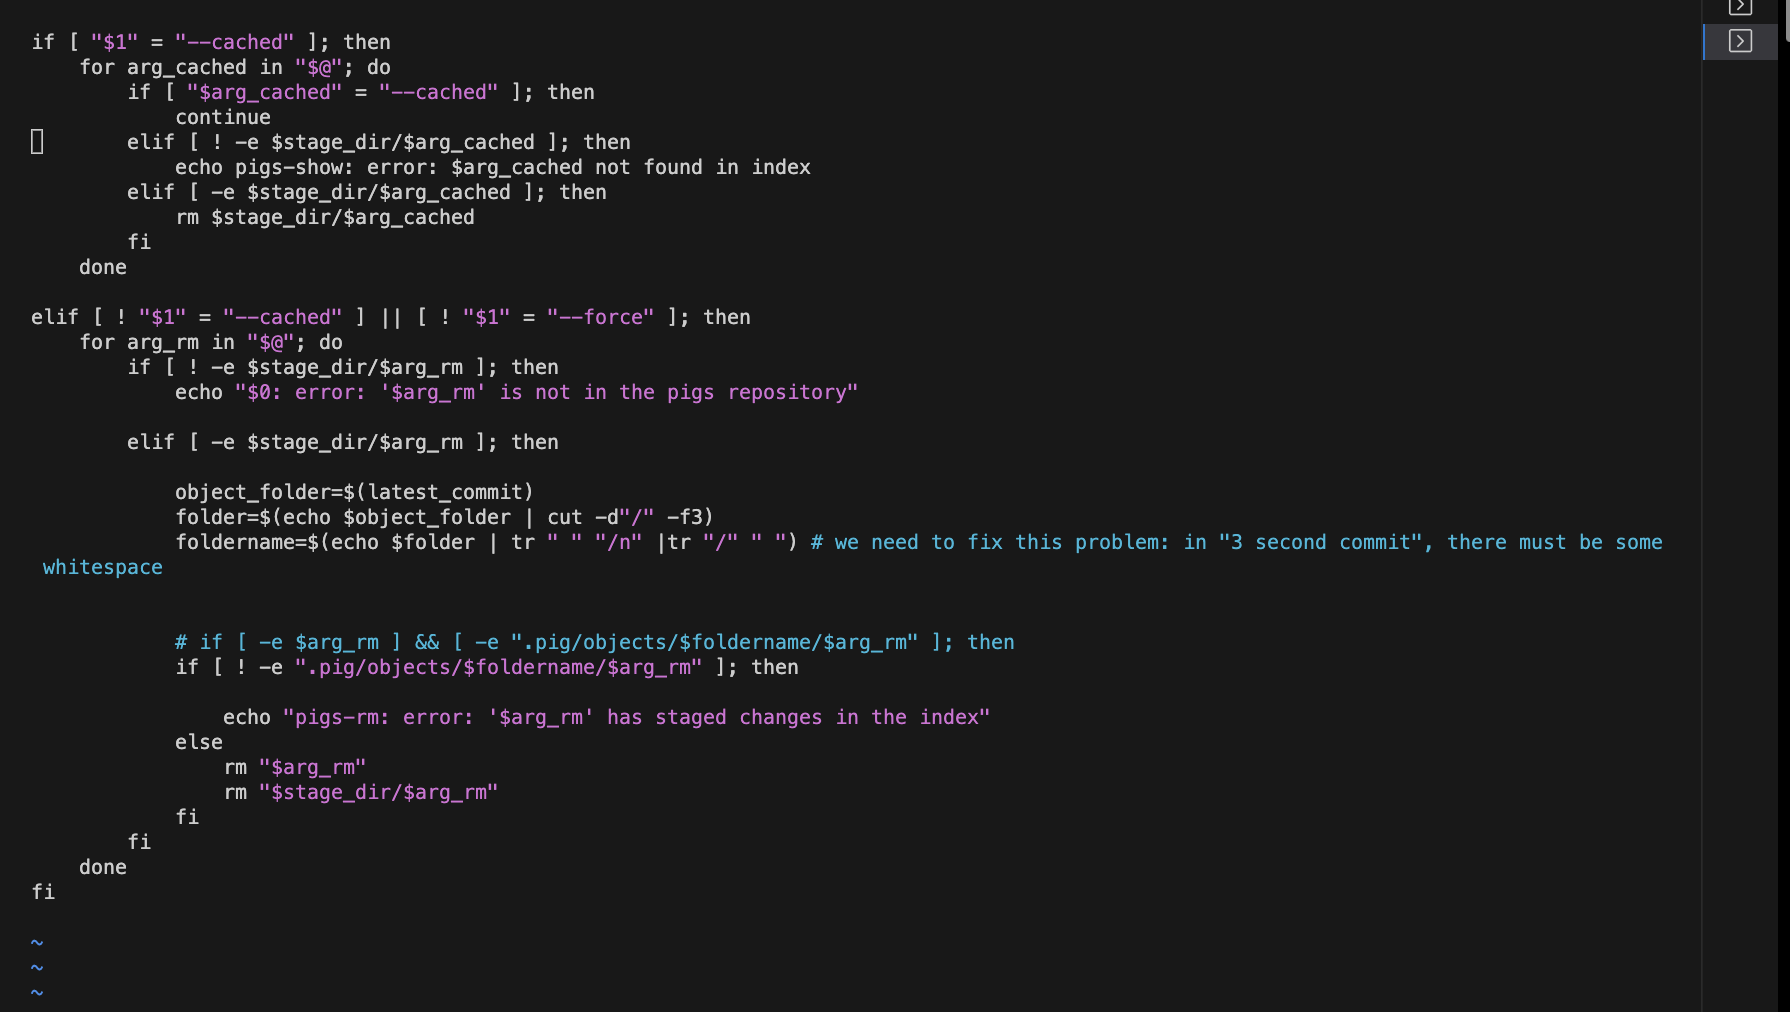